# Focos de Calor - Incêndios Florestais de 1998 - 2020

Base extraída do site de dados públicos do INPE: http://queimadas.dgi.inpe.br/queimadas/portal-static/estatisticas_estados/

Tutoriais para aprendizado do ARIMA : 
- https://www.vooo.pro/insights/guia-completo-para-criar-time-series-com-codigo-em-python/
- https://ichi.pro/pt/previsao-de-temperatura-com-modelo-arima-em-python-73096807304019
- https://github.com/minerandodados/mdrepo/blob/164cf328d0e007de260666d75a84bbf76defd2c3/Arima-Tutorial.ipynb
- https://github.com/IvanildoBatista/Series-Temporais/blob/master/AutoARIMA/Aplicando%20AutoARIMA%20em%20Python.ipynb

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (13,5)

import plotly.offline as py
import plotly.graph_objs as go

#Função para mostrar o gráfico no notebook
py.init_notebook_mode(connected=True)

In [2]:
from datetime import datetime

def transform_data (year, month):
    months = {
        'Janeiro' : '01',
        'Fevereiro' : '02',
        'Março': '03',
        'Abril': '04',
        'Maio': '05',
        'Junho': '06',
        'Julho': '07',
        'Agosto': '08',
        'Setembro': '09',
        'Outubro': '10',
        'Novembro': '11',
        'Dezembro': '12'
    }
    
    data = datetime.strptime(str(year) + '-' + months[month] + '-01', '%Y-%m-%d')
    
    return data

In [3]:
transform_data(2020, 'Janeiro')

datetime.datetime(2020, 1, 1, 0, 0)

In [4]:
archive = 'base_completa_foco_calor.csv'

base = pd.read_csv(archive)
#base['date'] = pd.to_datetime(base.date)
base

,year,number,month,state
0,1998,0,Janeiro,Acre
1,1999,0,Janeiro,Acre
2,2000,0,Janeiro,Acre
3,2001,0,Janeiro,Acre
4,2002,0,Janeiro,Acre
...,...,...,...,...
7759,2017,81,Dezembro,Tocantins
7760,2018,166,Dezembro,Tocantins
7761,2019,219,Dezembro,Tocantins
7762,2020,211,Dezembro,Tocantins


In [5]:
# Retirada dos dados de 2021
base = base[base['year'] < 2021].reset_index(drop=True)

In [6]:
base['data'] =  base.apply(lambda x: transform_data(x.year, x.month), axis=1)

In [7]:
base['data']

0      1998-01-01
1      1999-01-01
2      2000-01-01
3      2001-01-01
4      2002-01-01
          ...    
7447   2016-12-01
7448   2017-12-01
7449   2018-12-01
7450   2019-12-01
7451   2020-12-01
Name: data, Length: 7452, dtype: datetime64[ns]

In [8]:
base.tail(5)

,year,number,month,state,data
7447,2016,115,Dezembro,Tocantins,2016-12-01
7448,2017,81,Dezembro,Tocantins,2017-12-01
7449,2018,166,Dezembro,Tocantins,2018-12-01
7450,2019,219,Dezembro,Tocantins,2019-12-01
7451,2020,211,Dezembro,Tocantins,2020-12-01


In [9]:
# Informações sobre os dados
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7452 entries, 0 to 7451
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    7452 non-null   int64         
 1   number  7452 non-null   int64         
 2   month   7452 non-null   object        
 3   state   7452 non-null   object        
 4   data    7452 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 291.2+ KB


In [10]:
base.describe()

,year,number
count,7452.000000,7452.000000
mean,2009.000000,681.952630
std,6.633695,1968.740691
min,1998.000000,0.000000
25%,2003.000000,12.000000
50%,2009.000000,76.000000
75%,2015.000000,395.250000
max,2020.000000,37231.000000


In [11]:
base['number'].max()

37231

In [12]:
# Função para Série Temporal

def plot_forest_fires_timeline(df, title_graph):
    
    dataTemp = df.groupby(['year']).agg({'number': 'sum'}).reset_index()
    
    dataTemp['3-years-SMA'] = dataTemp['number'].rolling(window=3).mean()
    
    graph = go.Scatter(x = dataTemp['year'],
                    y = dataTemp['number'],
                    text = dataTemp['number'],
                    mode = 'markers+lines+text',
                    name = 'Focos de Calor',
                    textposition= 'top center'
                    )
    
    graph_sma = go.Scatter(x = dataTemp['year'],
                    y = dataTemp['3-years-SMA'],
                    mode = 'markers+lines',
                    name = 'Média Móvel do Triênio'
                    )
    
    data = [graph, graph_sma]

    layout = go.Layout(title = title_graph,
                      xaxis = {'title': 'Ano'},
                      yaxis = {'title': 'Número de Focos de Calor'},
                      height=450, 
                      width=1000,
                      legend=dict(
                        yanchor="top",
                        y= 0.95,
                        xanchor="right",
                        x=0.98,
                        bgcolor='rgba(255, 255, 255, 0)'
                      ))
            
    fig = go.Figure(data=data, layout=layout)
    
    return py.iplot(fig)
    

In [13]:
plot_forest_fires_timeline(base, 'Série Temporal dos Focos de Calor')

In [14]:
# Função para Gráfico de Barras

def plot_forest_fires_state(df, title_graph, modeGraphBar):
    
    dataTemp = df.groupby(['state']).agg({'number': 'sum'}).sort_values(
        by=['state']).reset_index()
    
    if modeGraphBar:
        graph = go.Bar(x = dataTemp['state'],
                    y = dataTemp['number'],
                    text = dataTemp['number'],
                    textposition='auto'
                    )
    else:
        graph = go.Scatter(x = dataTemp['state'],
                    y = dataTemp['number'],
                    mode = 'markers',
                    marker=dict(
                        size=dataTemp['number']/100,
                        sizemode='area',
                        color='rgb(255, 65, 54)',
                        sizemin=4,
                        line_width=2
                        )
                    )    
    
    data = [graph]

    layout = go.Layout(title = title_graph,
                      xaxis = {'title': 'Estado'},
                      yaxis = {'title': 'Número de Focos de Calor'},
                      height=600, 
                      width=1000)
            
    fig = go.Figure(data=data, layout=layout)
    
    return py.iplot(fig)

In [15]:
plot_forest_fires_state(base, 'Número de Focos de Calor por Estado', True)

In [16]:
# Função para Gráfico de Barras

def plot_forest_fires_month(df):
    
    dataTemp = df.groupby(['month']).agg({'number': 'sum'}).sort_values(
        by=['number'], ascending=False).reset_index()
    
    
    graph = go.Bar(x = dataTemp['month'],
                    y = dataTemp['number'],
                    text = dataTemp['number'],
                    textposition='auto'
                    )
    
    
    data = [graph]

    layout = go.Layout(title = 'Número de Focos de Calor por Mês',
                      xaxis = {'title': 'Estado'},
                      yaxis = {'title': 'Número de Focos de Calor'},
                      height=600, 
                      width=900)
            
    fig = go.Figure(data=data, layout=layout)
    
    return py.iplot(fig)

In [17]:
plot_forest_fires_month(base)

In [18]:
# Histograma dos focos de calor

def plot_histogram(df):

    graph = go.Histogram(x=df['number']) 

                          
    data = [graph]
    
    layout = go.Layout(title = 'Histograma dos Números de Focos de Calor',
                   xaxis = {'title': 'Distribuição'},
                   yaxis = {'title': 'Frequência'})
    
    fig = go.Figure(data=data, layout=layout)
    return py.iplot(fig)

In [19]:
plot_histogram(base)

In [20]:
# Boxplot do número de focos de calor

def plot_box_plot(df):
    
    graph = go.Box(y = df[df['state'] == 'Mato Grosso']['number'],
                name = 'Mato Grosso')
    
    graph1 = go.Box(y = df[df['state'] == 'Pará']['number'],
                name = 'Pará')
    
    graph2 = go.Box(y = df[df['state'] == 'Maranhão']['number'],
                name = 'Maranhão')
    
    data = [graph, graph1, graph2]
    
    layout = go.Layout(title = 'BoxPlot dos Números de Focos de Calor',
                      height=600, 
                      width=1000)
    
    fig = go.Figure(data=data, layout=layout)
    return py.iplot(fig)

In [21]:
plot_box_plot(base)

In [22]:
# Série Temporal dos Focos de Calor - Mato Grosso
base_temp = base.loc[base['state'] == 'Mato Grosso']
plot_forest_fires_timeline(base_temp, 'Série Temporal dos Focos de Calor - Mato Grosso')

In [23]:
# Série Temporal dos Focos de Calor - Pará
base_temp = base.loc[base['state'] == 'Pará']
plot_forest_fires_timeline(base_temp, 'Série Temporal dos Focos de Calor - Pará')

In [24]:
#Bubble Chart do Número de Focos de Calor por Estado - Setembro
base_temp = base.loc[base['month'] == 'Setembro']
plot_forest_fires_state(base_temp, 'Número de Focos de Calor por Estado - Setembro', False)

In [25]:
# Função para Gráfico de Barras

def plot_forest_fires_state_max_month(df, months, title_graph):
    
    data = []
    
    for month in months:
        dataTemp = df[df['month'] == month].groupby(['state']).agg(
            {'number': 'sum'}).nlargest(3, 'number').reset_index()
    
    
        graph= go.Bar(x = dataTemp['state'],
                    y = dataTemp['number'],
                    text = dataTemp['number'],
                    textposition='auto',
                    name = month
                    )
    
    
        data.append(graph)
        

    layout = go.Layout(title = title_graph,
                      xaxis = {'title': 'Estado'},
                      yaxis = {'title': 'Número de Focos de Calor'},
                      height=600, 
                      width=1000,
                      legend=dict(
                        yanchor='top',
                        y=0.98,
                        xanchor='right',
                        x=0.99,
                        bgcolor='rgba(255, 255, 255, 0)'
                      ))
            
    fig = go.Figure(data=data, layout=layout)
    
    return py.iplot(fig)

In [26]:
# Gráfico de barras dos Estados com Maiores Focos de Calor em Agosto, Setembro e Outubro
title = 'Estados com Maiores Focos de Calor em Agosto, Setembro e Outubro'
plot_forest_fires_state_max_month(base, ['Agosto', 'Setembro', 'Outubro'], title )

In [27]:
#Bubble Chart do Número de Focos de Calor por Estado - 2020
base_temp = base.loc[base['year'] == 2020]
plot_forest_fires_state(base_temp, 'Número de Focos de Calor por Estado - 2020', False)

# Dataset Pará

In [148]:
base_PA = base[base['state'] == 'Pará']
base_PA.set_index('data', inplace = True)
base_PA

,year,number,month,state
data,,,,
1998-01-01,1998,0,Janeiro,Pará
1999-01-01,1999,87,Janeiro,Pará
2000-01-01,2000,30,Janeiro,Pará
2001-01-01,2001,34,Janeiro,Pará
2002-01-01,2002,144,Janeiro,Pará
...,...,...,...,...
2016-12-01,2016,3051,Dezembro,Pará
2017-12-01,2017,4879,Dezembro,Pará
2018-12-01,2018,1005,Dezembro,Pará


In [149]:
base_PA['number']

data
1998-01-01       0
1999-01-01      87
2000-01-01      30
2001-01-01      34
2002-01-01     144
              ... 
2016-12-01    3051
2017-12-01    4879
2018-12-01    1005
2019-12-01    1745
2020-12-01    2184
Name: number, Length: 276, dtype: int64

In [150]:
base_PA = base_MT.asfreq(freq='MS')
base_PA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 276 entries, 1998-01-01 to 2020-12-01
Freq: MS
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    276 non-null    int64 
 1   number  276 non-null    int64 
 2   month   276 non-null    object
 3   state   276 non-null    object
dtypes: int64(2), object(2)
memory usage: 18.9+ KB


## Verificando Estacionariedade

**Dickey-Fuller** teste: esse é um dos testes estatísticos para verificar Estacionaridade. Aqui, a hipótese nula é que o TS é não-estacionária. Os resultados do teste são compostos por uma estatística de teste e alguns valores críticos para os níveis de confiança da diferença. Se o ‘teste estatístico’ é menor do que o “valor crítico”, podemos rejeitar a hipótese nula e dizer que a série é estacionária.

- Caso p-value > 0.05: Série não é estacionária e deve ser manipulada.
- Caso p-value <= 0.05: Série é estacionária e a predição pode ser realizada.

In [153]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['ADF','P-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

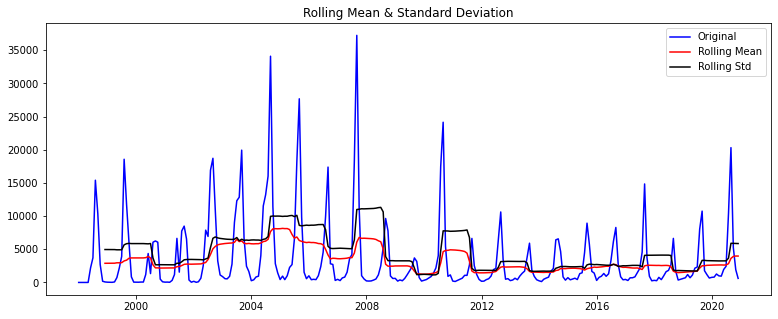

Results of Dickey-Fuller Test:
ADF                             -2.636124
P-value                          0.085759
#Lags Used                      14.000000
Number of Observations Used    261.000000
Critical Value (1%)             -3.455656
Critical Value (5%)             -2.872678
Critical Value (10%)            -2.572705
dtype: float64


In [168]:
#Testando se os dados de treino são estacionários
test_stationarity(base_PA['number'])

Percebe-se que a série não é estacionária dado que o P-value é maior que 0.05, dessa forma é necessário 
transformá-la numa série estacionária, para isso será utilizado o método por diferenciação, pois a mesma trata da tendência e da sazonalidade.

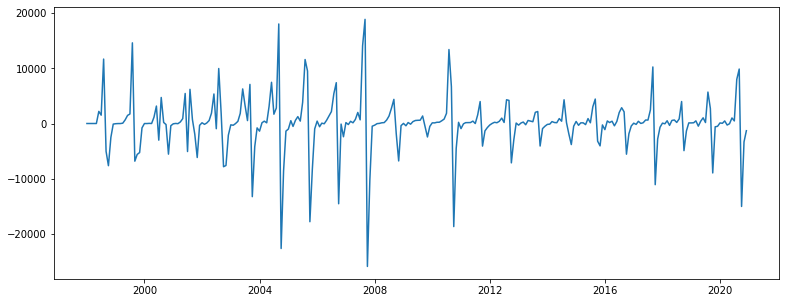

In [175]:
'''
Uso do Método por Diferenciação para gerar uma série estacionária
''' 

diff_PA= base_PA['number'].diff(1).fillna(0) 
plt.plot(diff_PA)

In [176]:
diff_PA

data
1998-01-01        0.0
1998-02-01        0.0
1998-03-01        0.0
1998-04-01        0.0
1998-05-01        0.0
               ...   
2020-08-01     8001.0
2020-09-01     9882.0
2020-10-01   -15053.0
2020-11-01    -3340.0
2020-12-01    -1307.0
Freq: MS, Name: number, Length: 276, dtype: float64

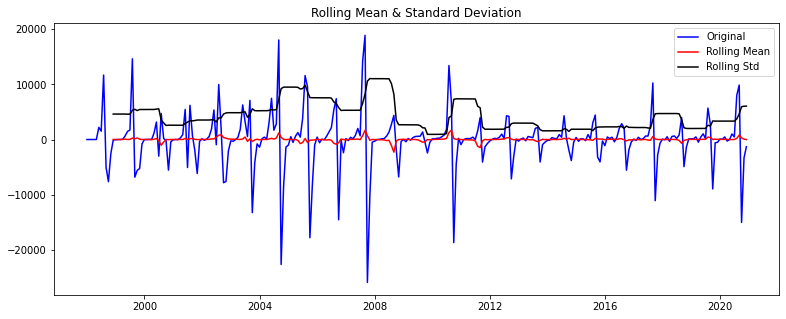

Results of Dickey-Fuller Test:
ADF                           -8.613567e+00
P-value                        6.379094e-14
#Lags Used                     1.200000e+01
Number of Observations Used    2.630000e+02
Critical Value (1%)           -3.455461e+00
Critical Value (5%)           -2.872593e+00
Critical Value (10%)          -2.572660e+00
dtype: float64


In [177]:
# Verificando se a mesma já está estacionária

test_stationarity(diff_PA)

Percebe-se que o P-value ficou abaixo de 0.05 e abaixo do valor crítico de 1%, dessa forma a série está estacionária com 99% de confiança. Somente uma diferenciação já deixa a série estacionária.

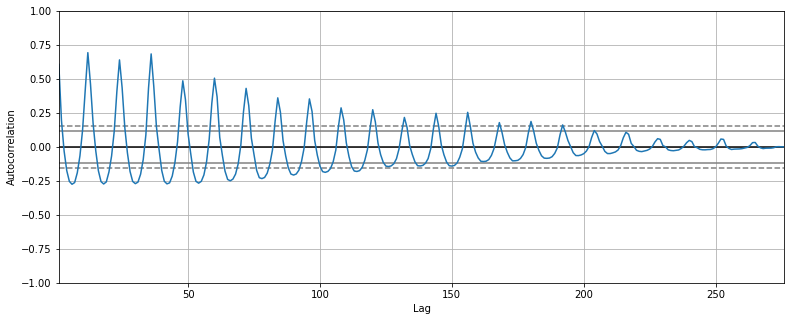

In [179]:
# Verificando Autocorrelação
from pandas.plotting import autocorrelation_plot

# autocorrelation plot 
autocorrelation_plot(base_PA['number'])
plt.show()

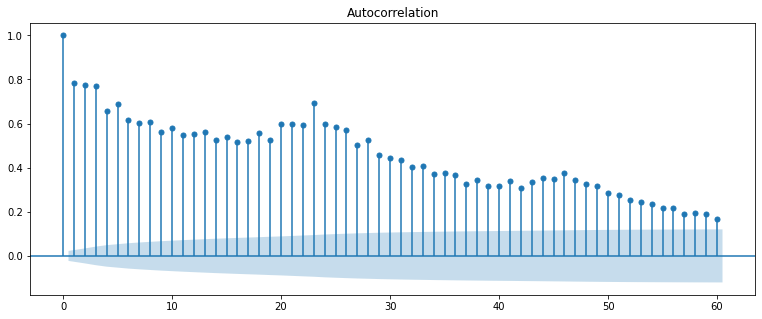

In [180]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(base['number'], lags=60)
plt.show()

## ARIMA

Após tornar a série estacionária, é aplicado o modelo ARIMA para previsão. ARIMA é composto por 3 termos (Auto-Regressão + Integrado + Média Móvel) e estes componentes são representados pelos parâmetros **p**, **d** e **q**.

Para descobrir a melhor combinação de parâmetros, será utilizada a biblioteca **pmdarima**. Através da função auto_arima, ele utiliza pontuação AIC para descobrir o melhor modelo preditivo.

O modelo arima contém alguns parâmetros

**ARIMA(p,d,q)**
- **p**: O número de lags que foram devem ser incluídos no modelo.
- **d**: O número de vezes que as observações serão diferenciadas.
- **q**: O tamanho de uma janela de média móvel. Também chamada de ordem de média móvel.

### Separando base de treino e teste

In [151]:
train_data_PA = base_PA['number'].loc['1998-01-01':'2019-12-01']
train_data_PA.shape

(264,)

In [152]:
test_data_PA = base_PA['number'].loc['2020-01-01':'2020-12-01']
test_data_PA.shape

(12,)

### Aplicando PMDARIMA

In [202]:
from pmdarima import auto_arima


model = auto_arima(base_PA['number'],start_p=1,start_q=1,max_p=6,max_q=6,m=12,
                   start_P=0,seasonal=True,d=1,D=1,trace=True,
                   error_action='ignore',suppress_warnings=True,stepwise=True)

model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.62 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5089.143, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5050.873, Time=0.33 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=5002.318, Time=1.27 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=5085.669, Time=0.08 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=2.05 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=9.48 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=5043.558, Time=0.43 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=9.82 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=5016.245, Time=1.09 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=4964.043, Time=3.78 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=inf, Time=0.32 sec
 ARIMA(0,1,2)(1,1,1)[12]             : AIC=inf, Time=5.70 sec
 ARIMA(0,1,2)(0,1,2)[12]             : AIC=inf, Time=6.68 sec
 ARIMA(0,1,2)(1,1,0)[12]             : AIC=4999.470, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  276
Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 12)   Log Likelihood               -2478.021
Date:                              Sun, 21 Mar 2021   AIC                           4964.043
Time:                                      19:32:01   BIC                           4978.332
Sample:                                           0   HQIC                          4969.785
                                              - 276                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4490      0.036    -12.450      0.000      -0.520      -0.378
ma.L2         -0.4668      0.048     -9.713      0.000      -0.561      -0.373
ma.S.L12      -0.5858      0.026    -22.319      0.000      -0.637      -0.534
sigma2      8.812e+06   3.77e+05     23.393      0.000    8.07e+06    9.55e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.65   Jarque-Bera (JB):               609.54
Prob(Q):                              0.20   Prob(JB):                         0.00
Heteroskedasticity (H):               0.29   Skew:                             0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [203]:
# Treino do modelo
model.fit(train_data_PA)

ARIMA(order=(0, 1, 2), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

## Teste

In [204]:
prediction = pd.DataFrame(model.predict(n_periods = 12),index=test_data_PA.index)
prediction.columns = ['predicted_numbers']
prediction

,predicted_numbers
data,
2020-01-01,373.653034
2020-02-01,564.634466
2020-03-01,978.855563
2020-04-01,747.931502
2020-05-01,1048.122556
2020-06-01,1847.140934
2020-07-01,2261.795379
2020-08-01,5830.521896
2020-09-01,9937.244306


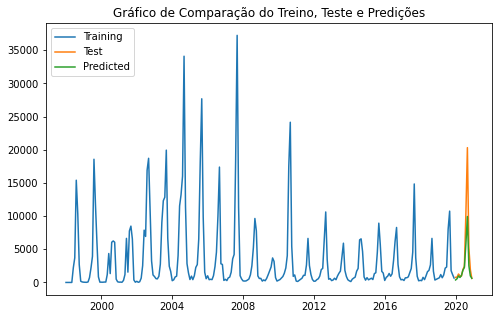

In [205]:
# Gráfico das predições

plt.figure(figsize=(8,5))
plt.plot(train_data_PA,label="Training")
plt.plot(test_data_PA,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'upper left')
plt.title('Gráfico de Comparação do Treino, Teste e Predições')
plt.show()

In [206]:
# Avaliando os resultados
from numpy import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test_data_PA, prediction))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 3385.331
